##**EFFICIENCY COMPARISON OF GRADIENT BOOSTING(GBM) AND ADAPTIVE BOOSTING(Adaboost)**



This project focuses on efficiency comparison of two boosting algorithms, namely GBM and Adaboost, on dataset of Tweet Sentiment analysis sourced from https://www.kaggle.com/datasets/kazanova/sentiment140 .

**Importing Libraries**

In [ ]:
import pandas as pd  #For data analysis and manipulation
import matplotlib.pyplot as plt # Used for plotting
import numpy as np # Helps in performing numerical operations
from sklearn.model_selection import train_test_split #Splits dataset into tarin and test data
from sklearn.feature_extraction.text import CountVectorizer #For converting text data into numerical features
from sklearn.ensemble import GradientBoostingClassifier #For Gradient Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier #For Adaptive Boosting Classifier
from sklearn.metrics import accuracy_score  # For calculating accuracy score
import nltk #Natural Lnaguage Toolkit
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') #Provides necessary text processing resources
from nltk.corpus import stopwords #stopwords for processing text
from nltk.tokenize import word_tokenize #For text tokenizing
from nltk.stem import WordNetLemmatizer #For lemmitizing words
from sklearn.feature_extraction.text import CountVectorizer
import re #Regular expression operations

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**DATA PREPARATION**

**Load Dataset**

In [ ]:
data=pd.read_csv("/content/training.1600000.processed.noemoticon.csv",encoding="latin1",header=None)

In [ ]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
data.columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [ ]:
data.columns = ["target", "id", "date", "flag", "user" ,"text"]

**DATA EXPLORATION AND PREPROCESSING**

**Correlation Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

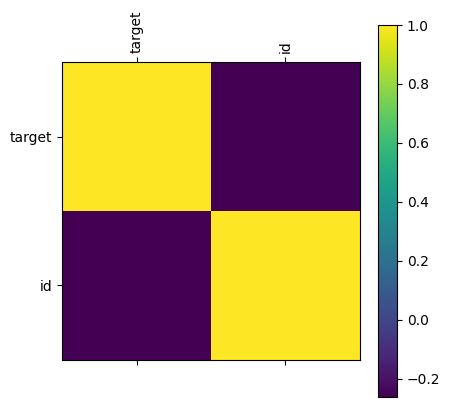

In [ ]:
numeric_data=data.select_dtypes(include=['number']) #Drop non-numeric columns first
#corelation matrix
plt.matshow(numeric_data.corr())
plt.xticks(range(numeric_data.shape[1]),numeric_data.columns,rotation=90) # x-axis labels set
plt.yticks(range(numeric_data.shape[1]),numeric_data.columns)# set y_axis labels
plt.colorbar()# add colors bar indicating scale
plt.show  #display plot

**Data Cleaning**

In [ ]:
# Check for missing values
print("Missing values in the dataset: ")
print(data.isnull().sum())
# Handle missing values by droping rows
data_cleaned =data.dropna()
#verify that missing values have been handeled
print("\nMissing values after handling: ")
print(data_cleaned.isnull().sum())

Missing values in the dataset: 
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

Missing values after handling: 
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [ ]:
data = data.drop(["id", "date", "flag", "user"], axis=1)

In [ ]:
#Mapping target labels to sentiment categories
target_map = {0: "NEGATIVE", 2:"NEUTRAL", 4: "POSITIVE"}
#Function to decode target labels
def decode_target(label):
    return target_map[int(label)]
#Apply above fuction to columns
data.target = data.target.apply(lambda x:decode_target(x))

target
NEGATIVE    800000
POSITIVE    800000
Name: count, dtype: int64

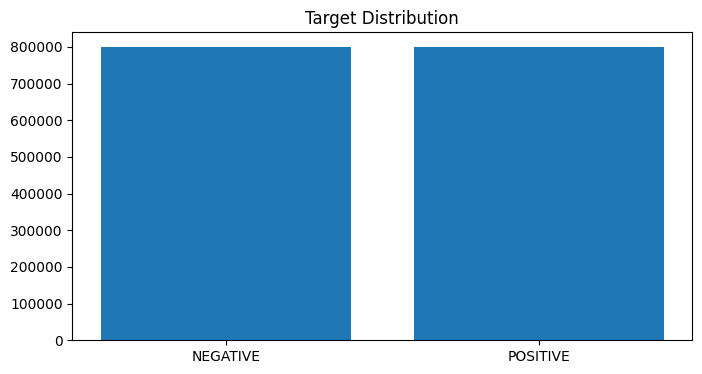

In [ ]:
#Set size of Figure
plt.figure(figsize=(8,4))
#Create bar plot for target values distribution
plt.bar(data["target"].value_counts().index, data["target"].value_counts().values)
plt.title("Target Distribution") #title
#Display counts for each target category
data["target"].value_counts()

**Text Preprocessing**

In [ ]:
stop_words= set(stopwords.words('english'))  #Get the set of English Stopwords
lemmatizer = WordNetLemmatizer() #Initialize the WordNet Lemmatizer
# Function for Text preprocessing
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers
    tokens = word_tokenize(text) # Tokenization
#remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)
# Apply Data preprocessing to text columns
data['text'] = data['text'].apply(preprocess_text)

**Model Building**

In [ ]:
#Splitting into features and labels
X =data['text'] #Feature
y = data['target'] #Label

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data
vectorizer =CountVectorizer() #initialize count vector object
X_train_vector = vectorizer.fit_transform(X_train) #fit and transform the train data
X_test_vector = vectorizer.transform(X_test) #transform the test data

**Model Training and Evaluation**

In [ ]:
# Train and evaluate Gradient Boosting Classifier
gbm =GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, random_state=42) #initialize gbm classifier
gbm.fit(X_train_vector, y_train) #Train GBM Classifier on vectorized training data
gbm_pred=gbm.predict(X_test_vector) # Predict labels for test Data
gbm_accuracy=accuracy_score(y_test, gbm_pred) #Calculate accuracy of predictions
print("Gradient Boosting Accuracy: ", gbm_accuracy)

Gradient Boosting Accuracy:  0.75361875


In [ ]:
# Train and Evaluate Adaptive Boosting  Classifier
# Create Adaboost Classifier object
adaboost =AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=42) # initialize adaboost classifier
adaboost.fit(X_train_vector, y_train) #Train Adaboost Classifier on vectorized training data
adaboost_pred =adaboost.predict(X_test_vector) #Predict labels for test data using trained classifier
adaboost_accuracy=accuracy_score(y_test, adaboost_pred ) #calculate accuracy of predictions
print("Adaptive Boosting: ", adaboost_accuracy)

Adaptive Boosting:  0.723296875


**Comparison**

In [ ]:
# Efficiency Comparison
print("Gradient Boosting Accuracy: ", gbm_accuracy)
print("Adaptive Boosting: ", adaboost_accuracy)

Gradient Boosting Accuracy:  0.75361875
Adaptive Boosting:  0.723296875
